# Title: Bank Marketing
### The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

In [1]:
#importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

#Setting to view all columns
pd.set_option('display.max_columns', None)

In [3]:
#Reading the dataset and coverting it into a dataframe
df= pd.read_csv('F:/capstone_project/Group_2_bank/bank-full - Copy.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#Checking the number of rows and columns
df.shape

(45211, 17)

In [5]:
#Checking non-null values and the type of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Note:
The Data set has 45211 rows and 17 columns(including target column).\
As per the info, \
Numerical features are: ('age','balance', 'day', 'duration', 'campaign', 'pdays','previous')\
Categorical features are:('job', 'marital', 'education', 'default','housing','loan', 'contact','month','poutcome')\
Info is showing no null values are there in table, but some columns are having 'unknown' as entry.So we will see the details further.

In [6]:
#Decriptive Statistics of numerical variables
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


By looking at the summary, it can be said that all the numerical features are right skewed.\
Let's visualise it with the help of distribution plot and box plot.

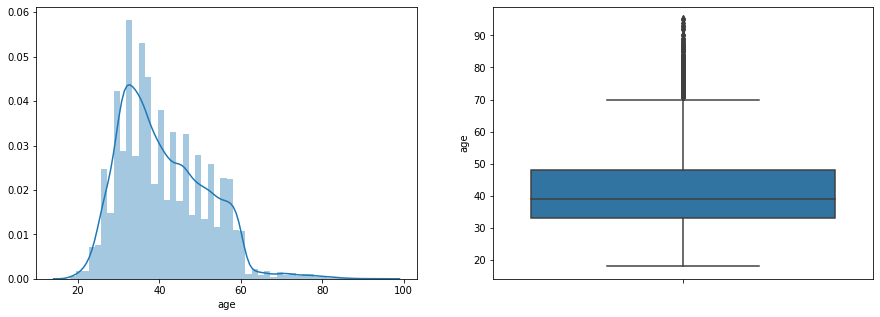

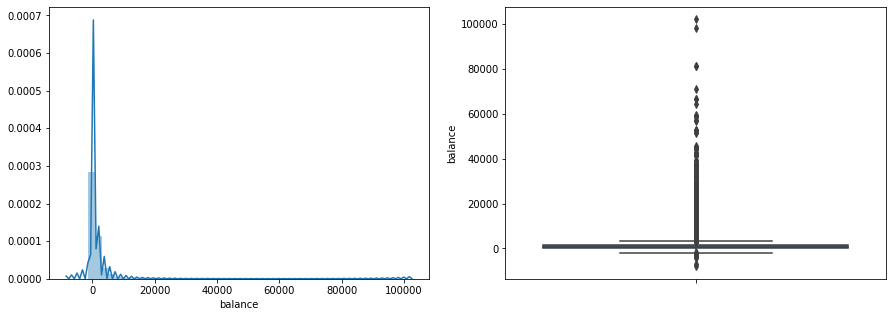

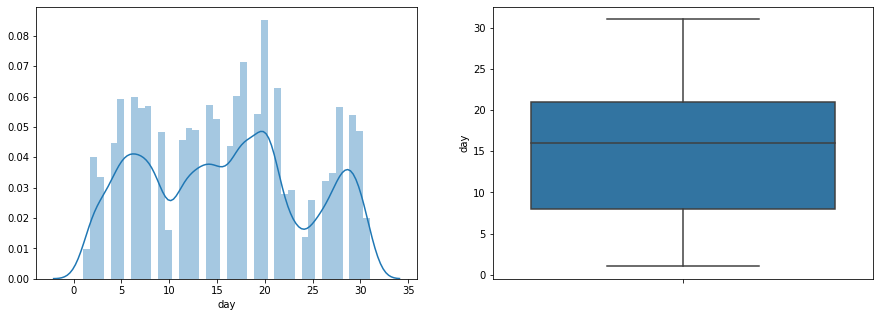

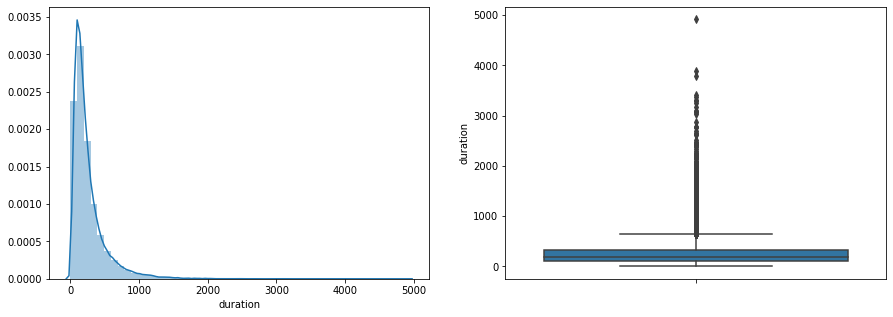

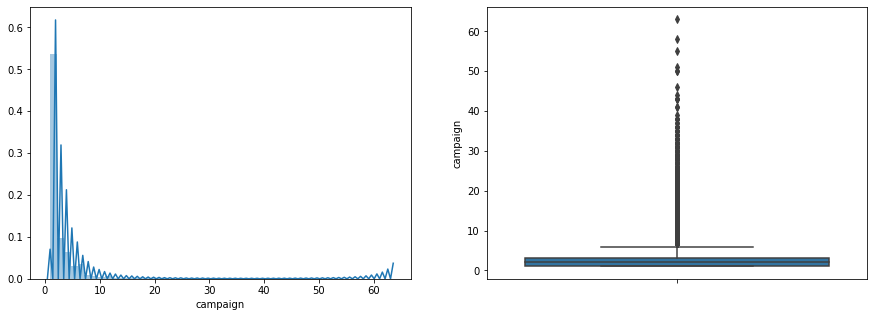

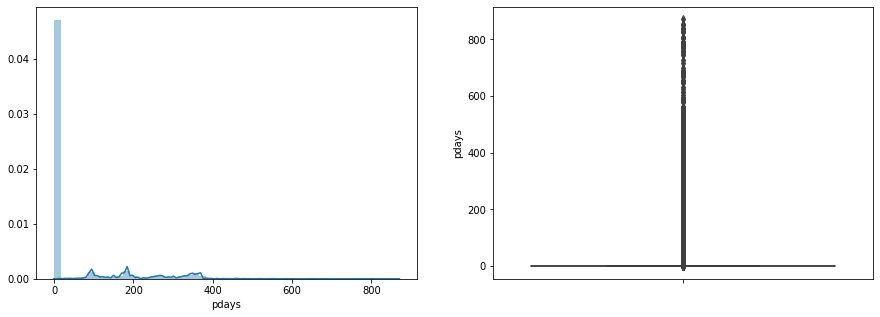

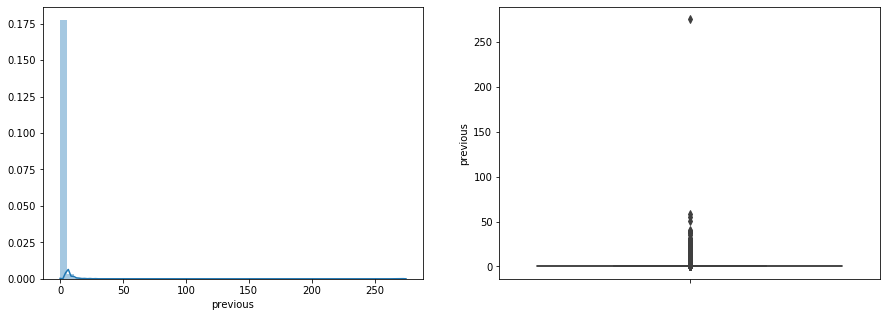

In [7]:
#Visualization of each numerical variable
num_cols = ['age','balance', 'day', 'duration', 'campaign', 'pdays','previous']

for i in num_cols:
    fig, ax1 = plt.subplots(1,2,figsize=(15,5))
    sns.distplot(df[i],ax=ax1[0])
    sns.boxplot(y=i,data = df,ax=ax1[1])
    plt.show()

Except 'day', all the numerical features have high outliers.

In [8]:
# Target Variable
len(df[df['y']=='yes']['y'])*100/len(df['y'])

11.698480458295547

Out of the total contacted customers, approximately 11.7% have subscribed. It seems correct representation with real life situation. So we would not call it imbalanced. 

### Now lets visualise all the independent features one by one and its impact on target variable 'y'

#### Age

In [9]:
df['age'].sort_values().unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 92, 93, 94, 95], dtype=int64)

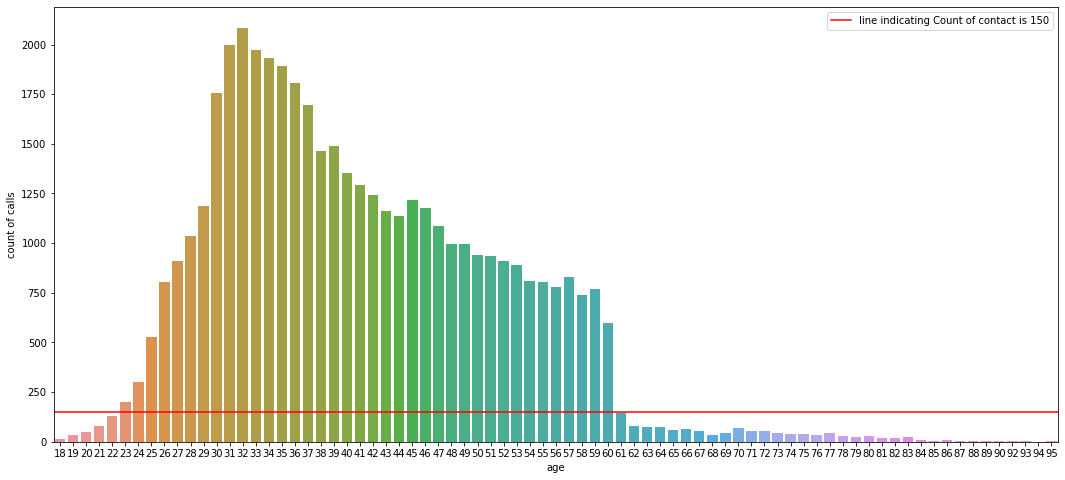

In [10]:
plt.figure(figsize = (18,8))
sns.countplot(df['age'])
plt.axhline(y=150, color = 'r')
plt.legend(labels=['line indicating Count of contact is 150'])
plt.ylabel('count of calls')
plt.show()

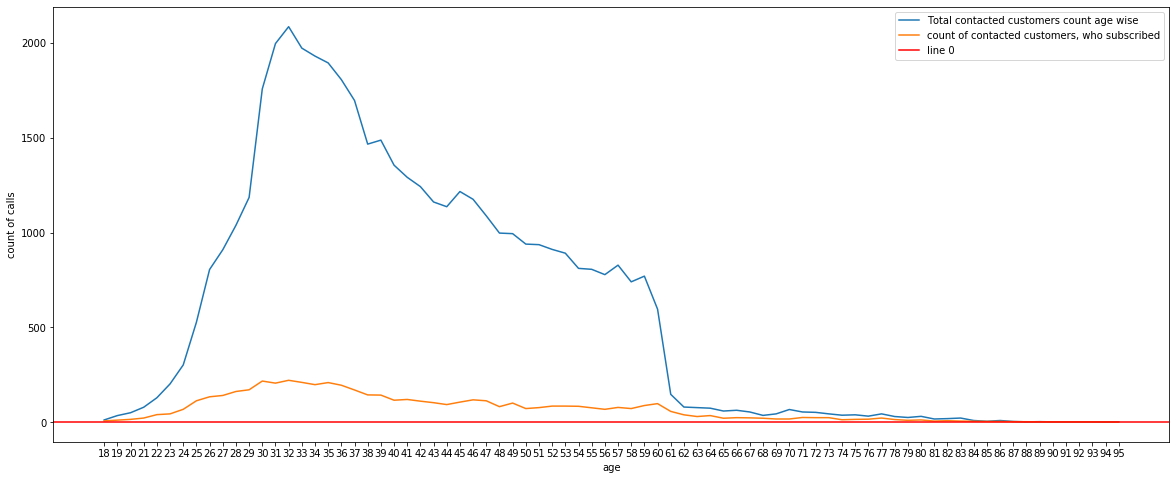

In [11]:
plt.figure(figsize = (20,8))
sns.lineplot(data=df['age'].value_counts())
sns.lineplot(data=df[df['y']=='yes']['age'].value_counts())
plt.xticks(np.arange(18, 96, step=1))
plt.axhline(y=0, color = 'r')
plt.legend(labels=['Total contacted customers count age wise','count of contacted customers, who subscribed','line 0'])
plt.ylabel('count of calls')
plt.xlabel('age')
plt.show()

Text(0.5, 0, 'has the client subscribed a term deposit?')

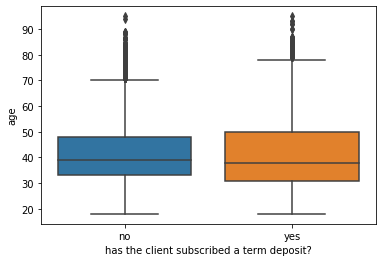

In [12]:
sns.boxplot(y=df['age'], x=df['y'])
plt.xlabel('has the client subscribed a term deposit?')

Here, we can say that calls have been made to the customers of all age from 18 to 95 years. \
Most of the call have been made to customers in the age group of 23 years to 60 years. \
So, it can be said that bank tried to target working class customers.\
The number of people who have subscribed in the same age group (23 to 60) are more.\
The subscription success rates of differnt age groups can be analysed by binning age into categories as follows.

In [13]:
df['age_group'] = df['age'].apply(lambda x : '18_to22' if x < 23 else ('23_to60' if x<61 else '61_to_95'))

Text(0, 0.5, 'success percentage of subscription w.r.t calls')

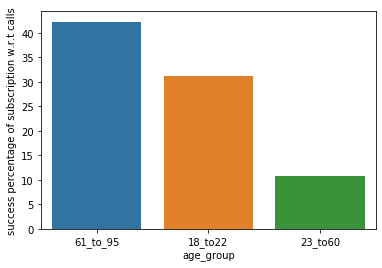

In [14]:
df_age = pd.DataFrame(df[df['y']=='yes']['age_group'].value_counts()*100/df['age_group'].value_counts())
df_age_new = pd.DataFrame({'age_group': list(df_age.index),'Percentage':df_age['age_group']})
sns.barplot(y='Percentage', x='age_group',data=df_age_new,order=df_age['age_group'].sort_values(ascending=False).index)
plt.ylabel('success percentage of subscription w.r.t calls')

Above plot shows success rate of subscription in each age group. Here we can see that the age group (23 to 60), who have been contacted the most, have very less success rate(around 10%).\
Less effort was needed to convince the people aged between 18 to 22 and 61 to 95.People in this group are more likely to subscribe and can be targetted.

#### Job

In [15]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

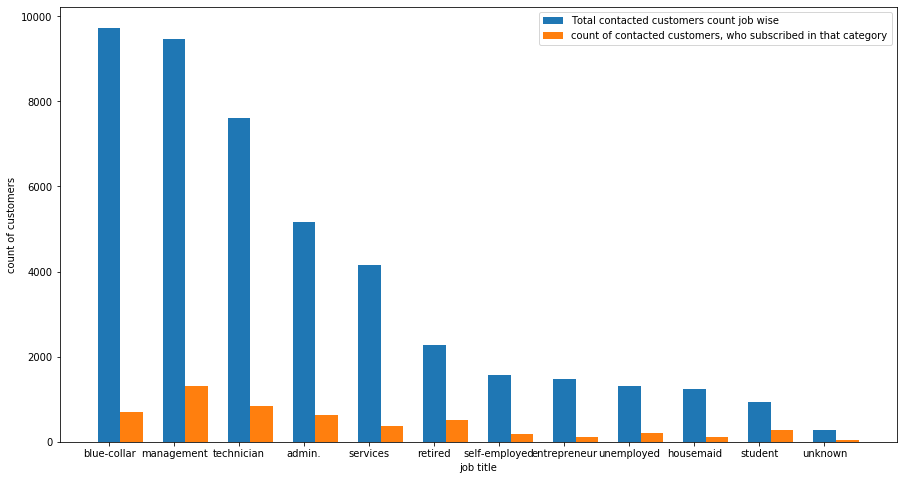

In [16]:
job = list(df['job'].value_counts().index)
total_count = list(pd.concat([df['job'].value_counts(), df[df['y']=='yes']['job'].value_counts()],sort= False, axis = 1).iloc[:,0])
total_count_subscribed = list(pd.concat([df['job'].value_counts(), df[df['y']=='yes']['job'].value_counts()],sort= False, axis = 1).iloc[:,1])
plt.figure(figsize = (15,8))
bar_width = 0.35
x_pos = np.arange(len(df['job'].value_counts()))
plt.bar(x_pos,total_count,width = bar_width)
plt.bar(x_pos + bar_width, total_count_subscribed, width = bar_width)
plt.xticks(x_pos, job)
plt.ylabel('count of customers')
plt.xlabel('job title')
plt.legend(labels=['Total contacted customers count job wise','count of contacted customers, who subscribed in that category'])
plt.show()

Management and technicians have more subscriptions than blue-collar job holders though blue-collars have been contacted the most.

Let's check success rate in this feature also

Text(0, 0.5, 'success percentage of subscription w.r.t calls')

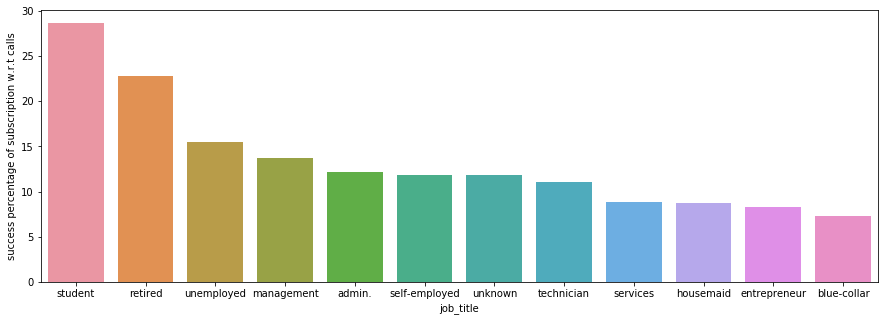

In [17]:
df_job = pd.DataFrame(df[df['y']=='yes']['job'].value_counts()*100/df['job'].value_counts())
df_job_new = pd.DataFrame({'job_title': list(df_job.index),'Percentage':df_job['job']})
plt.figure(figsize=(15,5))
sns.barplot(y='Percentage', x='job_title',data=df_job_new,order=df_job['job'].sort_values(ascending=False).index)
plt.ylabel('success percentage of subscription w.r.t calls')

Surprisingly, Students and retired people have very high success rate of subscription. We can relate it to age plot also.

#### Marital

In [18]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

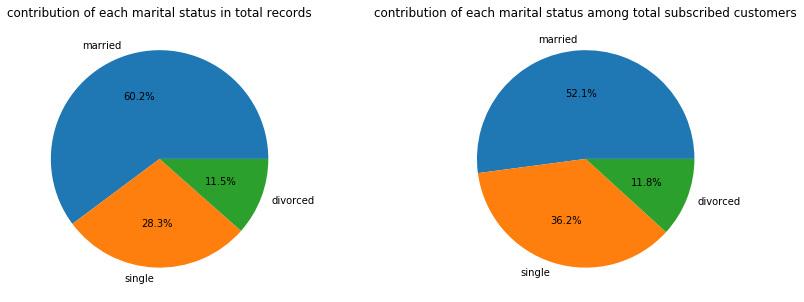

In [19]:
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
plt.pie(df['marital'].value_counts(), labels = ['married','single','divorced'],autopct='%1.1f%%')
plt.title('contribution of each marital status in total records')
plt.subplot(1,2,2)
plt.pie(df[df['y']=='yes']['marital'].value_counts(), labels = ['married','single','divorced'],autopct='%1.1f%%')
plt.title('contribution of each marital status among total subscribed customers')
plt.show()

Text(0, 0.5, 'success percentage of subscription wrt calls')

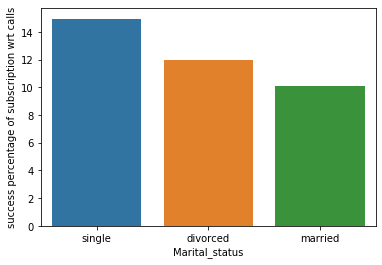

In [20]:
df_marital = pd.DataFrame(df[df['y']=='yes']['marital'].value_counts()*100/df['marital'].value_counts())
df_marital_new = pd.DataFrame({'Marital_status': list(df_marital.index),'Percentage':df_marital['marital']})
sns.barplot(y='Percentage', x='Marital_status',data=df_marital_new,order=df_marital['marital'].sort_values(ascending=False).index)
plt.ylabel('success percentage of subscription wrt calls')

The customers who are single have slightly higher chances of subscription of the term deposit compared to customers who are married or divorced (or widowed).

#### Education

In [21]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

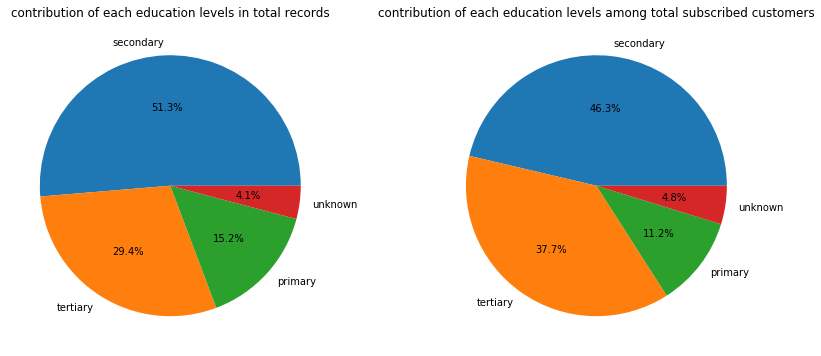

In [22]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
plt.pie(df['education'].value_counts(), labels = ['secondary','tertiary','primary','unknown'],autopct='%1.1f%%')
plt.title('contribution of each education levels in total records')
plt.subplot(1,2,2)
plt.pie(df[df['y']=='yes']['education'].value_counts(), labels = ['secondary','tertiary','primary','unknown'],autopct='%1.1f%%')
plt.title('contribution of each education levels among total subscribed customers')
plt.show()

Text(0, 0.5, 'success percentage of subscription wrt calls')

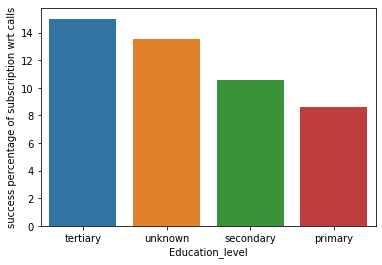

In [23]:
df_edu = pd.DataFrame(df[df['y']=='yes']['education'].value_counts()*100/df['education'].value_counts())
df_edu_new = pd.DataFrame({'Education_level': list(df_edu.index),'Percentage':df_edu['education']})
sns.barplot(y='Percentage', x='Education_level',data=df_edu_new,order=df_edu['education'].sort_values(ascending=False).index)
plt.ylabel('success percentage of subscription wrt calls')

The customers who have tertiary level of education have slightly higher chances of subscription of the term deposit compared to customers who are married or divorced (or widowed).

#### Default

In [24]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

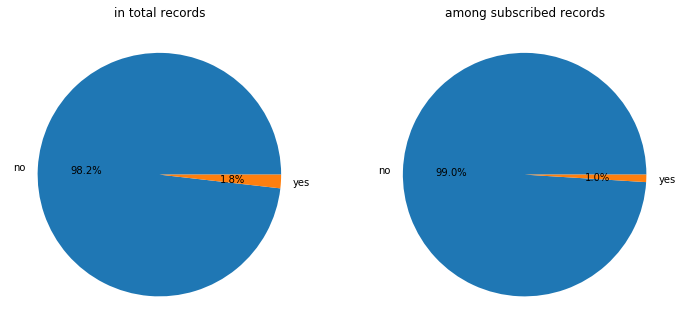

In [25]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.pie(df['default'].value_counts(), labels = ['no','yes'],autopct='%1.1f%%')
plt.title('in total records')
plt.subplot(1,2,2)
plt.pie(df[df['y']=='yes']['default'].value_counts(), labels = ['no','yes'],autopct='%1.1f%%')
plt.title('among subscribed records')
plt.show()

Text(0, 0.5, 'success percentage of subscription wrt calls')

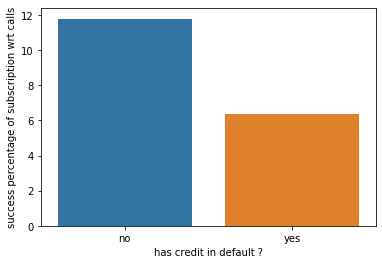

In [26]:
df_default = pd.DataFrame(df[df['y']=='yes']['default'].value_counts()*100/df['default'].value_counts())
df_default_new = pd.DataFrame({'credit_default': list(df_default.index),'Percentage':df_default['default']})
sns.barplot(y='Percentage', x='credit_default',data=df_default_new,order=df_default['default'].sort_values(ascending=False).index)
plt.xlabel('has credit in default ?')
plt.ylabel('success percentage of subscription wrt calls')

We can conclude here that those, who are not having credit in default, are more likely to subscribe.

#### Balance

Text(0, 0.5, 'average yearly balance, in euros')

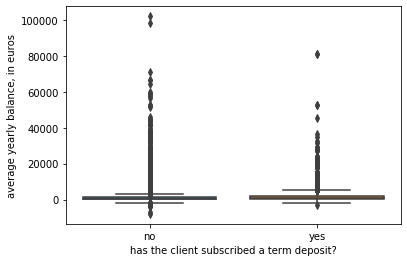

In [27]:
sns.boxplot(y=df['balance'],x=df['y'])
plt.xlabel('has the client subscribed a term deposit?')
plt.ylabel('average yearly balance, in euros')

In [28]:
neg_bal = len(df[df['balance']<0]['balance'])
neg_bal_sub = len(df[(df['y']=='yes') & (df['balance']<0)]['balance'])
print('percentage of people having negative balance and subscribed',round(neg_bal_sub*100/neg_bal,2),'%')

percentage of people having negative balance and subscribed 5.58 %


As per the above plots, y does not get affected much by balance. However one pattern can be seen that people having balance negative are very less likely to subscribe.

#### Housing

In [29]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [30]:
df[df['y']=='yes']['housing'].value_counts()

no     3354
yes    1935
Name: housing, dtype: int64

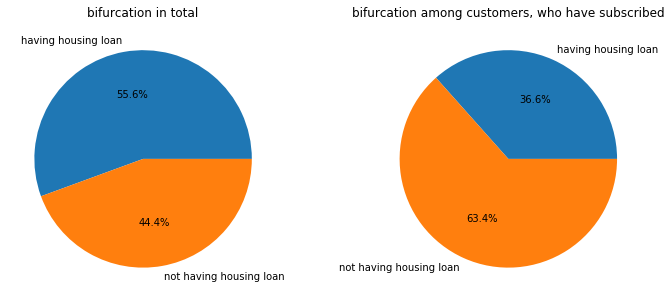

In [31]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
a= 'having housing loan'; b= 'not having housing loan'
plt.pie(df['housing'].value_counts(), labels = [a,b],autopct='%1.1f%%')
plt.title('bifurcation in total')
plt.subplot(1,2,2)
plt.pie(df[df['y']=='yes']['housing'].value_counts().sort_values(), labels = [a,b],autopct='%1.1f%%')
plt.title('bifurcation among customers, who have subscribed')
plt.show()

Text(0, 0.5, 'success percentage of subscription wrt calls')

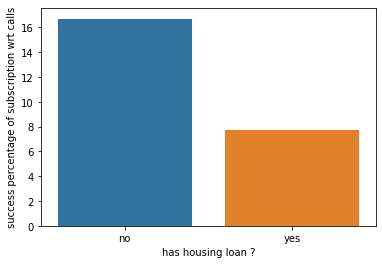

In [32]:
df_housing = pd.DataFrame(df[df['y']=='yes']['housing'].value_counts()*100/df['housing'].value_counts())
df_housing_new = pd.DataFrame({'Housing_Loan': list(df_housing.index),'Percentage':df_housing['housing']})
sns.barplot(y='Percentage', x='Housing_Loan',data=df_housing_new,order=df_housing['housing'].sort_values(ascending=False).index)
plt.xlabel('has housing loan ?')
plt.ylabel('success percentage of subscription wrt calls')

From the above plot it is evident that people not having housing loan are more likely to subscribe term deposit.

#### Loan

In [33]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [34]:
df[df['y']=='yes']['loan'].value_counts()

no     4805
yes     484
Name: loan, dtype: int64

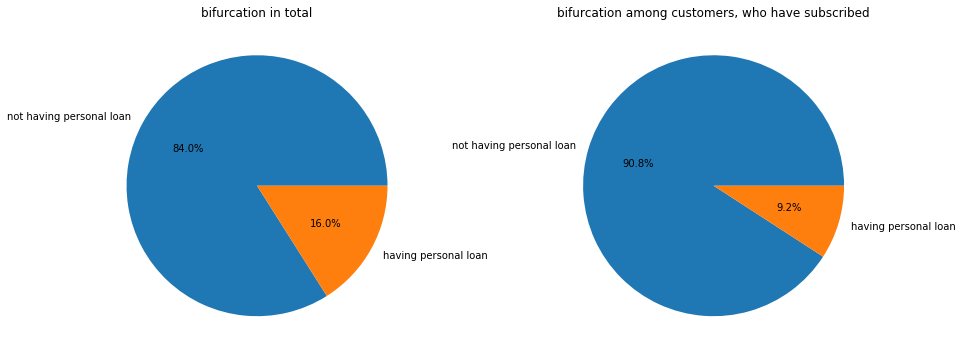

In [35]:
plt.figure(figsize = (15,6))
a='not having personal loan';b='having personal loan'
plt.subplot(1,2,1)
plt.pie(df['loan'].value_counts(), labels = [a,b],autopct='%1.1f%%')
plt.title('bifurcation in total')
plt.subplot(1,2,2)
plt.pie(df[df['y']=='yes']['loan'].value_counts(), labels = [a,b],autopct='%1.1f%%')
plt.title('bifurcation among customers, who have subscribed')
plt.show()

Text(0, 0.5, 'success percentage of subscription wrt calls')

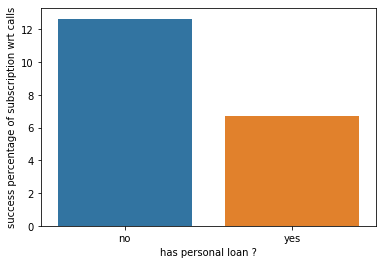

In [36]:
df_loan = pd.DataFrame(df[df['y']=='yes']['loan'].value_counts()*100/df['loan'].value_counts())
df_loan_new = pd.DataFrame({'Loan': list(df_loan.index),'Percentage':df_loan['loan']})
sns.barplot(y='Percentage', x='Loan',data=df_loan_new,order=df_loan['loan'].sort_values(ascending=False).index)
plt.xlabel('has personal loan ?')
plt.ylabel('success percentage of subscription wrt calls')

Above charts shows that person not having personal loan are more likely to subscribe term deposit.

#### Contact

In [37]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [38]:
df[df['y']=='yes']['contact'].value_counts()

cellular     4369
unknown       530
telephone     390
Name: contact, dtype: int64

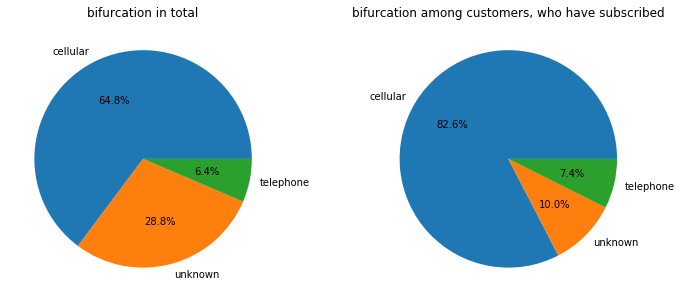

In [39]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.pie(df['contact'].value_counts(), labels = ['cellular','unknown','telephone'],autopct='%1.1f%%')
plt.title('bifurcation in total')
plt.subplot(1,2,2)
plt.pie(df[df['y']=='yes']['contact'].value_counts(), labels = ['cellular','unknown','telephone'],autopct='%1.1f%%')
plt.title('bifurcation among customers, who have subscribed')
plt.show()

Text(0, 0.5, 'success percentage of subscription wrt calls')

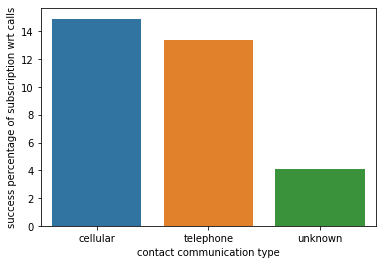

In [40]:
df_cont = pd.DataFrame(df[df['y']=='yes']['contact'].value_counts()*100/df['contact'].value_counts())
df_cont_new = pd.DataFrame({'contact': list(df_cont.index),'Percentage':df_cont['contact']})
sns.barplot(y='Percentage', x='contact',data=df_cont_new,order=df_cont['contact'].sort_values(ascending=False).index)
plt.xlabel('contact communication type')
plt.ylabel('success percentage of subscription wrt calls')

The mode of contact does not seem to be very significant with respect to rate the of subscription, Also a large part of this data is 'unknown' so we cannot conclude much about this feature.

#### Day

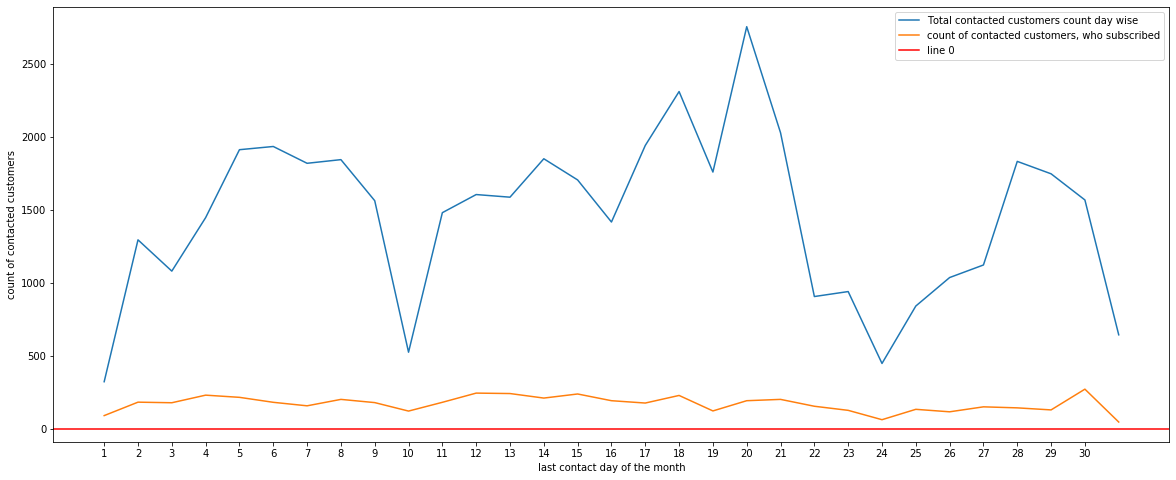

In [41]:
plt.figure(figsize = (20,8))
sns.lineplot(data=df['day'].value_counts())
sns.lineplot(data=df[df['y']=='yes']['day'].value_counts())
plt.xticks(np.arange(1, 31, step=1))
plt.axhline(y=0, color = 'r')
plt.legend(labels=['Total contacted customers count day wise','count of contacted customers, who subscribed','line 0'])
plt.ylabel('count of contacted customers')
plt.xlabel('last contact day of the month')
plt.show()

Text(0.5, 0, 'has the client subscribed a term deposit?')

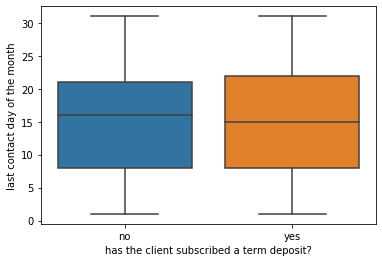

In [42]:
sns.boxplot(y=df['day'],x=df['y'])
plt.ylabel('last contact day of the month')
plt.xlabel('has the client subscribed a term deposit?')

Not much differerence is there in day wise subscribed customers. So nothing can be concluded here.

#### Month

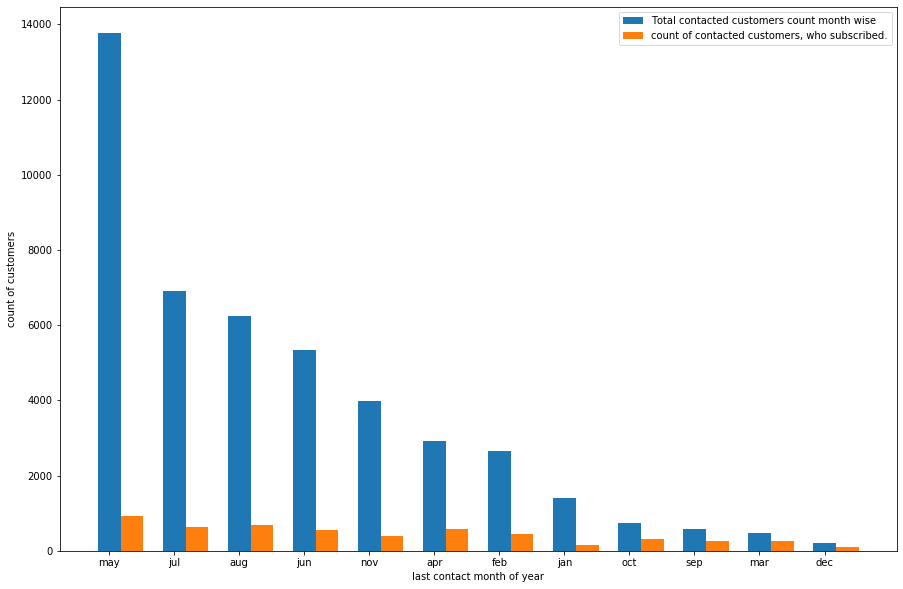

In [43]:
month = list(df['month'].value_counts().index)
total_count = list(pd.concat([df['month'].value_counts(), df[df['y']=='yes']['month'].value_counts()],sort= False, axis = 1).iloc[:,0])
total_count_subscribed = list(pd.concat([df['month'].value_counts(), df[df['y']=='yes']['month'].value_counts()],sort= False, axis = 1).iloc[:,1])
plt.figure(figsize = (15,10))
bar_width = 0.35
x_pos = np.arange(len(df['month'].value_counts()))
plt.bar(x_pos,total_count,width = bar_width)
plt.bar(x_pos + bar_width, total_count_subscribed, width = bar_width)
plt.xticks(x_pos, month)
plt.ylabel('count of customers')
plt.xlabel('last contact month of year')
plt.legend(labels=['Total contacted customers count month wise','count of contacted customers, who subscribed.'])

plt.show()

In [44]:
df['month'].value_counts().index

Index(['may', 'jul', 'aug', 'jun', 'nov', 'apr', 'feb', 'jan', 'oct', 'sep',
       'mar', 'dec'],
      dtype='object')

In [45]:
mon_list = ['jan', 'feb', 'mar', 'apr','may','jun', 'jul', 'aug', 'sep','oct','nov','dec']

Text(0.5, 0, 'last contact month of year')

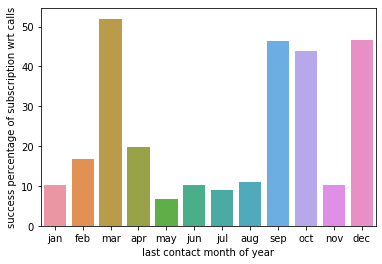

In [46]:
df_mon = pd.DataFrame(df[df['y']=='yes']['month'].value_counts()*100/df['month'].value_counts())
df_mon_new = pd.DataFrame({'month': list(df_mon.index),'Percentage':df_mon['month']})
sns.barplot(y='Percentage', x='month',data=df_mon_new,order=mon_list)
plt.ylabel('success percentage of subscription wrt calls')
plt.xlabel('last contact month of year')

We can say that a lot of disparity is there in number of calls done every month. Campaign was not uniform across whole year.\
Also it can be said that the months, where least number of calls have been done, have approx 50% success rate of subscription.The customers who were contacted in the months - March, December, September and October have higher chances of subscription than the customers who were contacted on the other months.

#### Duration

Text(0.5, 0, 'has the client subscribed a term deposit?')

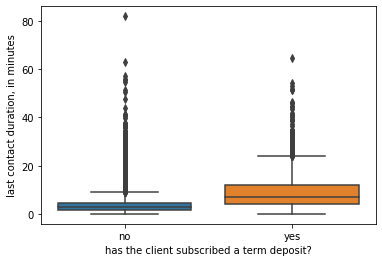

In [47]:
sns.boxplot(y=df['duration']/60, x=df['y'])
plt.ylabel('last contact duration, in minutes')
plt.xlabel('has the client subscribed a term deposit?')

In [48]:
len(df[(df['duration']>=600) & (df['y']=='yes')]['duration'])*100/len(df[df['duration']>=600]['duration'])

48.31667543398211

Customers , whose call duration is more than or equal to 10 minutes, are more likely to subscribe(almost 50%).\
The plot shows call duration is directly proportional to subscription.

#### Campaign

Text(0.5, 0, 'has the client subscribed a term deposit?')

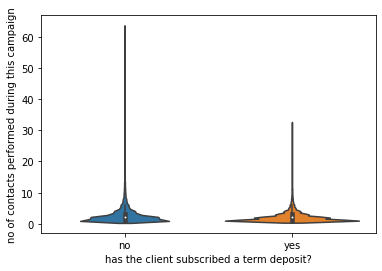

In [49]:
sns.violinplot(y=df['campaign'], x=df['y'])
plt.ylabel('no of contacts performed during this campaign')
plt.xlabel('has the client subscribed a term deposit?')

In [50]:
len(df[(df['campaign']>=3) & (df['y']=='yes')]['campaign'])*100/len(df[df['duration']>=3]['duration'])

2.9356458642125522

It shows, more the number of call, less is the chance of subscription. Customers who have been contacted 3 or more times , have subscription percentage as 3%(approximately) only.

campaign seems inversely propotional to duration. lets plot and check it.

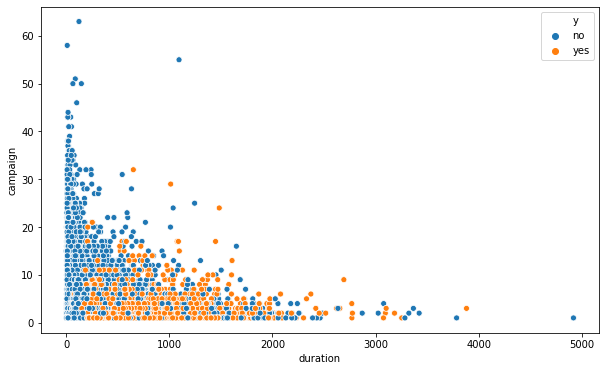

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['duration'], y=df['campaign'],hue=df['y'])

As per expectation, the above plot is representing the same. More the duration and less the no of calls, more is the chance of subscription.

#### poutcome

In [52]:
df[df['y']=='yes']['poutcome'].value_counts()

unknown    3386
success     978
failure     618
other       307
Name: poutcome, dtype: int64

In [53]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

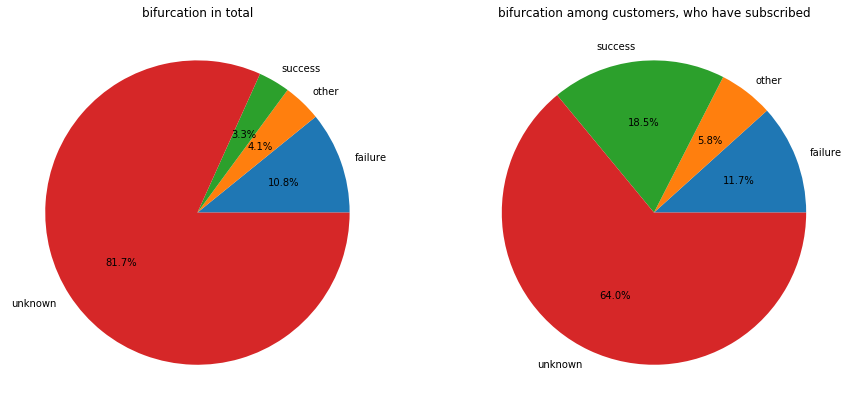

In [54]:
gr_in_total= df['poutcome'].value_counts()
gr_in_subscribed = df[df['y']=='yes']['poutcome'].value_counts()
grouped = pd.concat([gr_in_total,gr_in_subscribed], axis=1)
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
plt.pie(grouped.iloc[:,0], labels = ['failure','other','success','unknown'],autopct='%1.1f%%')
plt.title('bifurcation in total')
plt.subplot(1,2,2)
plt.pie(grouped.iloc[:,1], labels = ['failure','other','success','unknown'],autopct='%1.1f%%')
plt.title('bifurcation among customers, who have subscribed')
plt.show()

Text(0, 0.5, 'success percentage of subscription wrt calls')

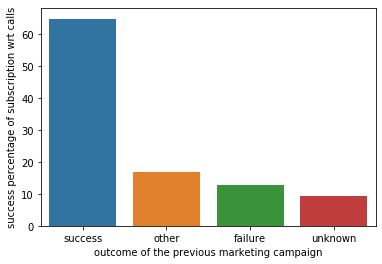

In [55]:
df_poutcome = pd.DataFrame(df[df['y']=='yes']['poutcome'].value_counts()*100/df['poutcome'].value_counts())
df_poutcome_new = pd.DataFrame({'poutcome': list(df_poutcome.index),'Percentage':df_poutcome['poutcome']})
sns.barplot(y='Percentage', x='poutcome',data=df_poutcome_new,order=df_poutcome['poutcome'].sort_values(ascending=False).index)
plt.xlabel('outcome of the previous marketing campaign')
plt.ylabel('success percentage of subscription wrt calls')

Here, we can say that those who had subscribed in the last campaign are more likely to subscribe in this campaign.

### Feature Selection and Missing Value Imputation

In [56]:
df_enc = df.copy()
#df_enc = df_enc.replace({'yes':0,'no':1})
df_enc['y'] = df_enc['y'].replace({'yes':0,'no':1})

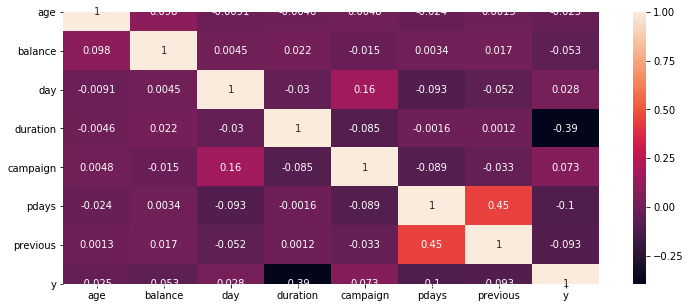

In [57]:
plt.figure(figsize=(12,5))
sns.heatmap(df_enc.corr(), annot=True)

As per the heatmap, pdays and previous is showing moderate correlation. Also these two columns are not having significant impact on 'y' and their purpose is solved by poutcome column.Also 'age' and 'day' column have the least correlation with y.

In [58]:
#Converting values in 'poutcome' where values are unknown and pdays values are -1
df.loc[(df.poutcome=='unknown') & (df.pdays==-1),'poutcome'] = 'Not_Contacted'
df['poutcome'].value_counts()

Not_Contacted    36954
failure           4901
other             1840
success           1511
unknown              5
Name: poutcome, dtype: int64

In [135]:
df1 = df.drop(columns=['pdays','previous','age_group'], axis=1)
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,Not_Contacted,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,Not_Contacted,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,Not_Contacted,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,Not_Contacted,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,Not_Contacted,no


In [136]:
#Converting all records with 'unknown' as NaN values
df1.replace('unknown',np.NaN, inplace=True)
df1['duration'] = df1['duration'].replace(0, np.NaN) 
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261.0,1,Not_Contacted,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151.0,1,Not_Contacted,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76.0,1,Not_Contacted,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92.0,1,Not_Contacted,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198.0,1,Not_Contacted,no


In [137]:
df1.isnull().sum()[df1.isnull().sum()>0]

job            288
education     1857
contact      13020
duration         3
poutcome         5
dtype: int64

In [138]:
#Label encoding all the categroical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['marital'] = le.fit_transform(df1['marital'])
df1['default'] = le.fit_transform(df1['default'])
df1['housing'] = le.fit_transform(df1['housing'])
df1['loan'] = le.fit_transform(df1['loan'])
df1['month'] = le.fit_transform(df1['month'])
df1['y'] = le.fit_transform(df1['y'])

In [139]:
obj = ['job','education','contact','poutcome']
for i in obj:
    df1[i] = df1[i].fillna('zzz')
    df1[i] = le.fit_transform(df1[i])
    df1[i] = df1[i].replace(list(df1[i].sort_values(ascending=False))[0], np.NaN)
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58,4.0,1,2.0,0,2143,1,0,NaN,5,8,261.0,1,0.0,0
1,44,9.0,2,1.0,0,29,1,0,NaN,5,8,151.0,1,0.0,0
2,33,2.0,1,1.0,0,2,1,1,NaN,5,8,76.0,1,0.0,0
3,47,1.0,1,NaN,0,1506,1,0,NaN,5,8,92.0,1,0.0,0
4,33,NaN,2,NaN,0,1,0,0,NaN,5,8,198.0,1,0.0,0


In [140]:
df1.isnull().sum()[df1.isnull().sum()>0]

job            288
education     1857
contact      13020
duration         3
poutcome         5
dtype: int64

#### Now we are left with 4 continuous features and all 4 are having outliers as we saw above in boxplot

#### So lets convert outliers as NaN values and then apply MICE imputation for all null values in the data set

In [65]:
#Finding values of Upper and Lower Whiskers of the boxplots of each numerical variable and converting outliers to NaN values
cols = ['age','balance','duration','campaign']
for i in cols:
    iqr = df1[i].quantile(q=0.75) - df1[i].quantile(q=0.25)
    ul = df1[i].quantile(q=0.75) + 1.5*iqr
    ll = df1[i].quantile(q=0.25) - 1.5*iqr
    print('upper limit for ',i,': ',ul)
    print('lower limit for ',i,': ',ll)
    print('IQR value for ',i,': ',iqr)
    df1.loc[df1[i] > ul,i] = np.NaN
    df1.loc[df1[i] < ll,i] = np.NaN
df1.head()

upper limit for  age :  70.5
lower limit for  age :  10.5
IQR value for  age :  15.0
upper limit for  balance :  3462.0
lower limit for  balance :  -1962.0
IQR value for  balance :  1356.0
upper limit for  duration :  643.0
lower limit for  duration :  -221.0
IQR value for  duration :  216.0
upper limit for  campaign :  6.0
lower limit for  campaign :  -2.0
IQR value for  campaign :  2.0


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58.0,4.0,1,2.0,0,2143.0,1,0,NaN,5,8,261.0,1.0,0.0,0
1,44.0,9.0,2,1.0,0,29.0,1,0,NaN,5,8,151.0,1.0,0.0,0
2,33.0,2.0,1,1.0,0,2.0,1,1,NaN,5,8,76.0,1.0,0.0,0
3,47.0,1.0,1,NaN,0,1506.0,1,0,NaN,5,8,92.0,1.0,0.0,0
4,33.0,NaN,2,NaN,0,1.0,0,0,NaN,5,8,198.0,1.0,0.0,0


In [66]:
df1.isnull().sum()[df1.isnull().sum()>0]

age            487
job            288
education     1857
balance       4729
contact      13020
duration      3238
campaign      3064
poutcome         5
dtype: int64

In [67]:
df2 = df1.drop('y', axis=1)

#### Now Let's apply MICE and impute for all null values

In [68]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [69]:
mice_imputer = IterativeImputer(initial_strategy = 'median', imputation_order = 'random',random_state=3) #'median' is used as initial strategy because there is mix of numerical and categorical variables with null values.

In [70]:
df2.iloc[:, :] = np.round(mice_imputer.fit_transform(df2)) #the output is in decimals, thus, rounding off the values to obtain 0's and 1's for categorical variables.

In [71]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome
0,58.0,4.0,1.0,2.0,0.0,2143.0,1.0,0.0,0.0,5.0,8.0,261.0,1.0,0.0
1,44.0,9.0,2.0,1.0,0.0,29.0,1.0,0.0,0.0,5.0,8.0,151.0,1.0,0.0
2,33.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,5.0,8.0,76.0,1.0,0.0
3,47.0,1.0,1.0,1.0,0.0,1506.0,1.0,0.0,0.0,5.0,8.0,92.0,1.0,0.0
4,33.0,5.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,8.0,198.0,1.0,0.0


In [72]:
#Checking if imputation was successful
df2.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
poutcome     0
dtype: int64

In [73]:
num_cols_na = ['age','balance', 'day', 'duration', 'campaign']

#### Verifying the skewness after mice imputation

In [74]:
for i in num_cols_na:
    print("\n\nFeature : ",i)
    print("Skewness in original dataset : ", df[i].skew())
    print("Skewness in mice imputed dataset with outliers as na : ", df2[i].skew())



Feature :  age
Skewness in original dataset :  0.6848179257252598
Skewness in mice imputed dataset with outliers as na :  0.4001931253761543


Feature :  balance
Skewness in original dataset :  8.360308326166326
Skewness in mice imputed dataset with outliers as na :  1.3290868631921382


Feature :  day
Skewness in original dataset :  0.09307901402122411
Skewness in mice imputed dataset with outliers as na :  0.09307901402122411


Feature :  duration
Skewness in original dataset :  3.144318099423456
Skewness in mice imputed dataset with outliers as na :  1.0515454358854113


Feature :  campaign
Skewness in original dataset :  4.898650166179674
Skewness in mice imputed dataset with outliers as na :  1.2349327488653978


In [75]:
# Joining the mice imputed dataset and y to form a complete dataset
df3 = pd.concat([df2,df1['y']], axis=1)
df3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58.0,4.0,1.0,2.0,0.0,2143.0,1.0,0.0,0.0,5.0,8.0,261.0,1.0,0.0,0
1,44.0,9.0,2.0,1.0,0.0,29.0,1.0,0.0,0.0,5.0,8.0,151.0,1.0,0.0,0
2,33.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,5.0,8.0,76.0,1.0,0.0,0
3,47.0,1.0,1.0,1.0,0.0,1506.0,1.0,0.0,0.0,5.0,8.0,92.0,1.0,0.0,0
4,33.0,5.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,8.0,198.0,1.0,0.0,0


In [76]:
df3 = df3.astype('int')
df3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58,4,1,2,0,2143,1,0,0,5,8,261,1,0,0
1,44,9,2,1,0,29,1,0,0,5,8,151,1,0,0
2,33,2,1,1,0,2,1,1,0,5,8,76,1,0,0
3,47,1,1,1,0,1506,1,0,0,5,8,92,1,0,0
4,33,5,2,1,0,1,0,0,0,5,8,198,1,0,0


### Checking VIF for all variables

In [77]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [78]:
#Checking presence of Multicollinearity with Variance Inflation Factor
X_vif=pd.concat([df3.drop('y',axis=1),df[['previous','pdays']]],axis=1)

In [79]:
X_vif.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,previous,pdays
0,58,4,1,2,0,2143,1,0,0,5,8,261,1,0,0,-1
1,44,9,2,1,0,29,1,0,0,5,8,151,1,0,0,-1
2,33,2,1,1,0,2,1,1,0,5,8,76,1,0,0,-1
3,47,1,1,1,0,1506,1,0,0,5,8,92,1,0,0,-1
4,33,5,2,1,0,1,0,0,0,5,8,198,1,0,0,-1


In [80]:
Xc_vif= sm.add_constant(X_vif)
vif_all = pd.DataFrame([vif(Xc_vif.values,i) for i in range(Xc_vif.shape[1])], index= Xc_vif.columns, columns=['VIF'])
vif_all

,VIF
const,59.553180
age,1.307734
job,1.053949
marital,1.227991
education,1.089055
default,1.023586
balance,1.053788
housing,1.174078
loan,1.020848
contact,1.036292


Most of the VIF values are close to 1 indicating no multicollinearity. However, we get higher VIF values for poutcome and pdays(same can be inferred from the correlation plot). Since, poutcome column is deduced from pdays and previous columns, therefore, these two columns will be removed.

### All the initial preparation is done for the data set. Now let's check Multicolinearity and statistical importance of the independent variables over the dependent variables. 

In [81]:
X= df3.drop('y', axis=1)
y= df3['y']

In [82]:
Xc= sm.add_constant(X)
vif_val = pd.DataFrame([vif(Xc.values,i) for i in range(Xc.shape[1])], index= Xc.columns, columns=['VIF'])
vif_val

,VIF
const,59.430729
age,1.307518
job,1.053464
marital,1.227979
education,1.088037
default,1.023543
balance,1.053213
housing,1.142122
loan,1.020667
contact,1.035793


Now, no multicollinearity exists in the data set as VIF values are very close to 1.

Lets check the summary of Logit Regression

In [83]:
model= sm.Logit(y,Xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.300406
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45196
Method:                           MLE   Df Model:                           14
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                  0.1676
Time:                        22:54:17   Log-Likelihood:                -13582.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1049      0.123    -25.144      0.000      -3.347      -2.863
age           -0.0028      0.002     -1.569      0.117      -0.006       0.001
job            0.0134      0.005      2.621      0.009       0.003       0.024
marital        0.1151      0.029      3.906      0.000       0.057       0.173
education      0.2228      0.026      8.672      0.000       0.172       0.273
default       -0.1517      0.150     -1.012      0.311      -0.446       0.142
balance        0.0002    1.9e-05     10.229      0.000       0.000       0.000
housing       -0.8666      0.034    -25.355      0.000      -0.934      -0.800
loan          -0.4845      0.052     -9.233      0.000      -0.587      -0.382
contact        0.1513      0.064      2.371      0.018       0.026       0.276
day           -0.0036      0.002     -1.900      0.057      -0.007       0.000
month         -0.0043      0.005     -0.825      0.410      -0.014       0.006
duration       0.0045      0.000     43.194      0.000       0.004       0.005
campaign      -0.1201      0.014     -8.568      0.000      -0.148      -0.093
poutcome       0.7117      0.017     41.871      0.000       0.678       0.745
==============================================================================
"""

In the summary we can see that some features are having p-values more than 0.05. Let's eliminate these by backward elimination method.

In [84]:
#Backward elimination method
cols = list(Xc.columns)

while len(cols)>0:
    X1 = Xc[cols]
    model = sm.Logit(y,X1).fit()
    p = model.pvalues
    max_p = max(p)
    feature_maxp = p.idxmax()
    
    if max_p > 0.05:
        print('feature removed: ',feature_maxp)
        print('p-value of feature: ',max_p)
        cols.remove(feature_maxp)
    else:
        break
        
print('remaining columns: ',cols)

Optimization terminated successfully.
         Current function value: 0.300406
         Iterations 7
feature removed:  month
p-value of feature:  0.4095505299593265
Optimization terminated successfully.
         Current function value: 0.300414
         Iterations 7
feature removed:  default
p-value of feature:  0.30569361407802964
Optimization terminated successfully.
         Current function value: 0.300426
         Iterations 7
feature removed:  age
p-value of feature:  0.11874012577583998
Optimization terminated successfully.
         Current function value: 0.300453
         Iterations 7
feature removed:  day
p-value of feature:  0.0572011645668036
Optimization terminated successfully.
         Current function value: 0.300493
         Iterations 7
remaining columns:  ['const', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'contact', 'duration', 'campaign', 'poutcome']


In [85]:
cols.remove('const')
X = df3[cols]

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=3, stratify= y)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((31647, 10), (13564, 10), (31647,), (13564,))

### Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score, confusion_matrix, classification_report,roc_curve,precision_recall_curve, f1_score

In [89]:
#Running Logistic Regression on Train Data
lr= LogisticRegression(random_state=3, solver='liblinear')
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

overall accuracy:  0.8931336303599078
roc_auc_score:  0.7766736998536234
confusion_matrix:
 [[27622   323]
 [ 3059   643]]
classification_report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     27945
           1       0.67      0.17      0.28      3702

    accuracy                           0.89     31647
   macro avg       0.78      0.58      0.61     31647
weighted avg       0.87      0.89      0.86     31647



Text(0, 0.5, 'TPR')

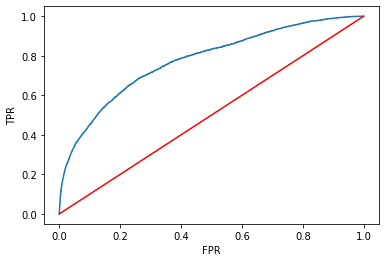

In [90]:
#Predicting y from the train data
y_pred_train = lr.predict(X_train)
y_pred_prob_train= lr.predict_proba(X_train)[:,1]
print('overall accuracy: ',accuracy_score(y_train,y_pred_train))
print('roc_auc_score: ',roc_auc_score(y_train,y_pred_prob_train))
print('confusion_matrix:\n',confusion_matrix(y_train,y_pred_train))
print('classification_report:\n',classification_report(y_train,y_pred_train))
fpr, tpr, thresholds=roc_curve(y_train,y_pred_prob_train)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

overall accuracy:  0.8902241226776763
roc_auc_score:  0.7646840860020564
confusion_matrix:
 [[11814   163]
 [ 1326   261]]
classification_report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11977
           1       0.62      0.16      0.26      1587

    accuracy                           0.89     13564
   macro avg       0.76      0.58      0.60     13564
weighted avg       0.87      0.89      0.86     13564



Text(0, 0.5, 'TPR')

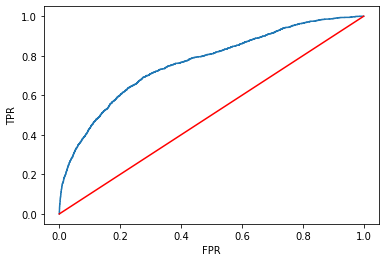

In [91]:
y_pred_test = lr.predict(X_test)
y_pred_prob_test = lr.predict_proba(X_test)[:,1]
print('overall accuracy: ',accuracy_score(y_test,y_pred_test))
print('roc_auc_score: ',roc_auc_score(y_test,y_pred_prob_test))
print('confusion_matrix:\n',confusion_matrix(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_test,y_pred_test))
fpr, tpr, thresholds=roc_curve(y_test,y_pred_prob_test)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

Here, we can see that overall accuracy is high but precision and recall values are very low. So let's check out the distribution of probabilities for both the class of target variable.

In [92]:
prob = pd.DataFrame({'prob':y_pred_prob_test}, index= X_test.index)
prob['y_est'] = y_pred_test
prob['y_act'] = y_test
prob.head()

,prob,y_est,y_act
7264,0.036916,0,0
37353,0.110197,0,0
25011,0.333865,0,0
21748,0.043846,0,0
42344,0.061571,0,0


In [133]:
df_0= prob[prob['y_act']==0]
df_1= prob[prob['y_act']==1]

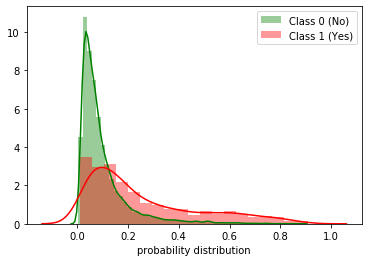

In [134]:
sns.distplot(df_0['prob'], color='g')
sns.distplot(df_1['prob'], color='r')
plt.xlabel('probability distribution')
plt.legend(labels=['Class 0 (No)','Class 1 (Yes)'])
plt.show()

By looking at this plot, we can say that a threshold of 0.5 will definately give poor recall and precision value because most of the class 1 ('subscribe') probabilities are less than 0.5. So we need to shift the threshold towards zero.

### Changing the thresholds to improve the recall score

Youden's index is often used in conjunction with Receiver Operating Characteristic (ROC) analysis. Youden's index is defined for all points of an ROC curve, and the maximum value of the index may be used as a criterion for selecting the optimum cut-off point when a diagnostic test gives a numeric rather than a dichotomous result. 

Formula for J-Statistic

**J = Sensitivity + Specificity – 1**

This formula can be re-written as

**J = TPR + (1 - FPR) -1 = TPR-FPR**

Best Threshold=0.110330


Text(0, 0.5, 'TPR')

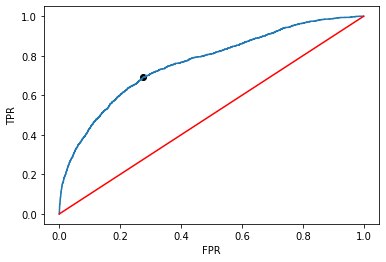

In [95]:
# Plotting the ROC-AUC and identifying the optimal J-Statistic value

fpr, tpr, thresholds=roc_curve(y_test,y_pred_prob_test)
J = tpr - fpr     #Youden's J-Statistic
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [96]:
#Testing with new threshold using Youden’s J statistic.

y_test_pred_newthreshold = (lr.predict_proba(X_test)>=best_thresh).astype(int)[:,1]
print(y_test_pred_newthreshold)

[0 0 1 ... 0 0 1]


In [97]:
#Applying 'y' predicted using the new threshold to find metrics

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred_newthreshold))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred_newthreshold))
print('F1 score - Test : ', f1_score(y_test,y_test_pred_newthreshold,average='weighted'))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred_newthreshold))


Confusion Matrix - Test :  
 [[8681 3296]
 [ 490 1097]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.95      0.72      0.82     11977
           1       0.25      0.69      0.37      1587

    accuracy                           0.72     13564
   macro avg       0.60      0.71      0.59     13564
weighted avg       0.87      0.72      0.77     13564

F1 score - Test :  0.7678474745231969
Overall Accuracy - Test :  0.7208787968150988


### Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint,uniform as sp_uniform

In [100]:
dtc= DecisionTreeClassifier(random_state=3)


params = {
          'max_features' : sp_randint(1,10),
          'max_depth' : sp_randint(2,20),
          'min_samples_split' :sp_randint(2,25),
          'min_samples_leaf' :  sp_randint(2,25),
          'criterion' : ['gini','entropy']}

rsearch = RandomizedSearchCV(dtc,param_distributions=params,n_iter=200,cv=3,scoring='roc_auc',n_jobs=-1,random_state=3)

rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=3,
             

In [101]:
rsearch.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 8,
 'min_samples_leaf': 21,
 'min_samples_split': 16}

Confusion Matrix - Test :  
 [[11885    92]
 [ 1330   257]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11977
           1       0.74      0.16      0.27      1587

    accuracy                           0.90     13564
   macro avg       0.82      0.58      0.60     13564
weighted avg       0.88      0.90      0.86     13564

F1 score - Test :  0.265495867768595
Overall Accuracy - Test :  0.8951636685343557
AUC - Test :  0.8200615714881795


Text(0, 0.5, 'TPR')

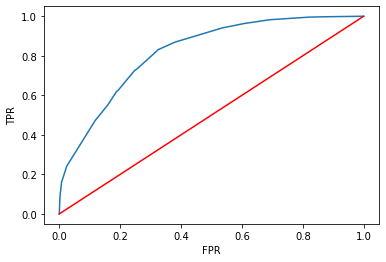

In [103]:
y_test_pred= rsearch.predict(X_test)
y_test_prob = rsearch.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

Best Threshold=0.136000


Text(0, 0.5, 'TPR')

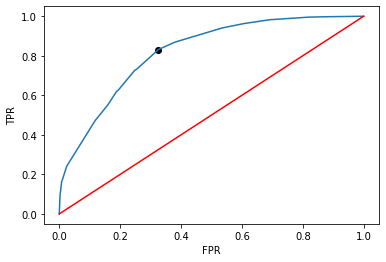

In [104]:
# Plotting the ROC-AUC and identifying the optimal J-Statistic value

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
J = tpr - fpr     #Youden's J-Statistic
ix = np.argmax(J)
best_thresh = np.round(thresholds[ix],3)
print('Best Threshold=%f' % (best_thresh))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [106]:
#Testing with new threshold using Youden’s J statistic.

y_test_pred_newthreshold = (rsearch.predict_proba(X_test)>=best_thresh).astype(int)[:,1]
print(y_test_pred_newthreshold)

[1 0 1 ... 0 0 0]


In [107]:
#Applying 'y' predicted using the new threshold to find metrics

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred_newthreshold))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred_newthreshold))
print('F1 score - Test : ', f1_score(y_test,y_test_pred_newthreshold))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred_newthreshold))


Confusion Matrix - Test :  
 [[8105 3872]
 [ 270 1317]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.97      0.68      0.80     11977
           1       0.25      0.83      0.39      1587

    accuracy                           0.69     13564
   macro avg       0.61      0.75      0.59     13564
weighted avg       0.88      0.69      0.75     13564

F1 score - Test :  0.38872491145218424
Overall Accuracy - Test :  0.6946328516661752


### Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 3)

In [110]:

params = {'n_estimators' : sp_randint(50,150),
          'max_features' : sp_randint(1,10),
          'max_depth' : sp_randint(2,20),
          'min_samples_split' :sp_randint(2,25),
          'min_samples_leaf' :  sp_randint(2,25),
          'criterion' : ['gini','entropy']}

rsearch = RandomizedSearchCV(rfc,param_distributions=params,n_iter=100,cv=3,scoring='roc_auc',n_jobs=-1,random_state=3)

rsearch.fit(X,y)
rsearch.best_params_

{'criterion': 'gini',
 'max_depth': 18,
 'max_features': 5,
 'min_samples_leaf': 19,
 'min_samples_split': 23,
 'n_estimators': 106}

Confusion Matrix - Test :  
 [[11845   132]
 [ 1310   277]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11977
           1       0.68      0.17      0.28      1587

    accuracy                           0.89     13564
   macro avg       0.79      0.58      0.61     13564
weighted avg       0.87      0.89      0.86     13564

F1 score - Test :  0.2775551102204409
Overall Accuracy - Test :  0.8936891772338543
AUC - Test :  0.8502199053121087


Text(0, 0.5, 'TPR')

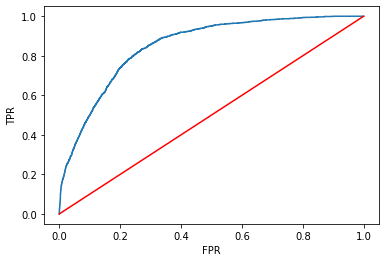

In [112]:
y_test_pred=rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

Best Threshold=0.122000


Text(0, 0.5, 'TPR')

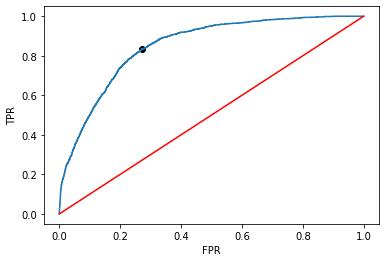

In [113]:
# Plotting the ROC-AUC and identifying the optimal J-Statistic value

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
J = tpr - fpr     #Youden's J-Statistic
ix = np.argmax(J)
best_thresh = np.round(thresholds[ix],3)
print('Best Threshold=%f' % (best_thresh))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [114]:
#Testing with new threshold using Youden’s J statistic.

y_test_pred_newthreshold = (rf.predict_proba(X_test)>=best_thresh).astype(int)[:,1]
print(y_test_pred_newthreshold)

#Applying 'y' predicted using the new threshold to find metrics

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred_newthreshold))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred_newthreshold))
print('F1 score - Test : ', f1_score(y_test,y_test_pred_newthreshold))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred_newthreshold))


[0 0 1 ... 0 0 1]
Confusion Matrix - Test :  
 [[8703 3274]
 [ 262 1325]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.97      0.73      0.83     11977
           1       0.29      0.83      0.43      1587

    accuracy                           0.74     13564
   macro avg       0.63      0.78      0.63     13564
weighted avg       0.89      0.74      0.78     13564

F1 score - Test :  0.42838667959909466
Overall Accuracy - Test :  0.7393099380713654


### KNN Classifier

In [115]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
Xs=ss.fit_transform(X)

X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

In [116]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

params={'n_neighbors' : [195,197,199,201,203],'p' : [1,2]}

gsearch_knn = GridSearchCV(knn, param_grid=params, cv =3,n_jobs=-1,scoring='roc_auc')

gsearch_knn.fit(Xs,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [195, 197, 199, 201, 203], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [117]:
gsearch_knn.best_params_

{'n_neighbors': 203, 'p': 1}

Confusion Matrix - Train :  
 [[27741   204]
 [ 3185   517]]
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     27945
           1       0.72      0.14      0.23      3702

    accuracy                           0.89     31647
   macro avg       0.81      0.57      0.59     31647
weighted avg       0.88      0.89      0.86     31647

Overall Accuracy - Train :  0.8929124403576958
AUC - Train :  0.8274024505378754


Confusion Matrix - Test :  
 [[11895    82]
 [ 1366   221]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11977
           1       0.73      0.14      0.23      1587

    accuracy                           0.89     13564
   macro avg       0.81      0.57      0.59     13564
weighted avg       0.88      0.89      0.86     13564

Overall Accuracy - Test :  0.893246829843704
F1 score - Test :  0.2338624

Text(0, 0.5, 'TPR')

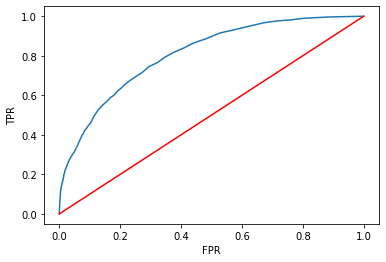

In [118]:
knn = KNeighborsClassifier(**gsearch_knn.best_params_)

knn.fit(X_trains,y_train)
y_train_pred=knn.predict(X_trains)
#y_train_prob = lr.predict_proba(X_train)
y_train_prob = knn.predict_proba(X_trains)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_train,y_train_pred))
print('Classification Report - Train : ','\n' , classification_report(y_train,y_train_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_train,y_train_pred))
print('AUC - Train : ' , roc_auc_score(y_train,y_train_prob))
print("\n")
y_test_pred=knn.predict(X_tests)
y_test_prob = knn.predict_proba(X_tests)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('F1 score - Test : ' , f1_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

Best Threshold=0.103000


Text(0, 0.5, 'TPR')

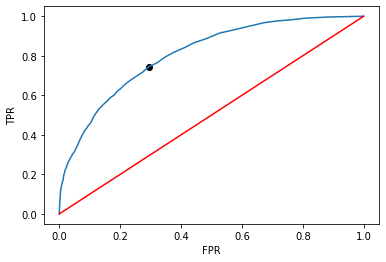

In [119]:
# Plotting the ROC-AUC and identifying the optimal J-Statistic value

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
J = tpr - fpr     #Youden's J-Statistic
ix = np.argmax(J)
best_thresh = np.round(thresholds[ix],3)
print('Best Threshold=%f' % (best_thresh))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [120]:
#Testing with new threshold using Youden’s J statistic.

y_test_pred_newthreshold = (knn.predict_proba(X_tests)>=best_thresh).astype(int)[:,1]
print(y_test_pred_newthreshold)

#Applying 'y' predicted using the new threshold to find metrics

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred_newthreshold))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred_newthreshold))
print('F1 score - Test : ', f1_score(y_test,y_test_pred_newthreshold))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred_newthreshold))


[0 1 1 ... 0 1 1]
Confusion Matrix - Test :  
 [[8452 3525]
 [ 405 1182]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.95      0.71      0.81     11977
           1       0.25      0.74      0.38      1587

    accuracy                           0.71     13564
   macro avg       0.60      0.73      0.59     13564
weighted avg       0.87      0.71      0.76     13564

F1 score - Test :  0.37559580552907534
Overall Accuracy - Test :  0.7102624594514892


### Ada Boost

In [121]:
from sklearn.ensemble import AdaBoostClassifier

In [122]:
ada = AdaBoostClassifier(random_state=3)
ada.fit(X_train,y_train)
y_train_pred=ada.predict(X_train)
#y_train_prob = dt.predict_proba(X_train)
y_train_prob = ada.predict_proba(X_train)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_train,y_train_pred))
print('AUC - Train : ' , roc_auc_score(y_train,y_train_prob))
print('Classification Report - Train : ','\n' , classification_report(y_train,y_train_pred))

Confusion Matrix - Train :  
 [[27582   363]
 [ 2945   757]]
Overall Accuracy - Train :  0.8954719246690049
AUC - Train :  0.8482355796709965
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     27945
           1       0.68      0.20      0.31      3702

    accuracy                           0.90     31647
   macro avg       0.79      0.60      0.63     31647
weighted avg       0.88      0.90      0.87     31647



Confusion Matrix - Test :  
 [[11809   168]
 [ 1279   308]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11977
           1       0.65      0.19      0.30      1587

    accuracy                           0.89     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564

F1 score - Test :  0.2985942801745031
Overall Accuracy - Test :  0.893320554408729
AUC - Test :  0.8365287037500304


Text(0, 0.5, 'TPR')

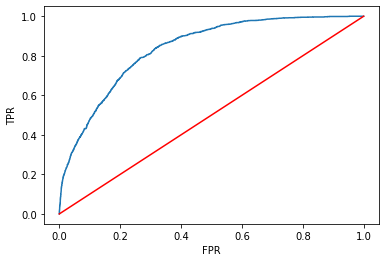

In [123]:
y_test_pred=ada.predict(X_test)
y_test_prob = ada.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

Best Threshold=0.490000


Text(0, 0.5, 'TPR')

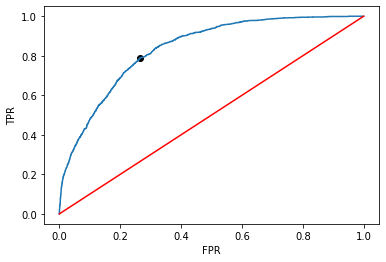

In [124]:
# Plotting the ROC-AUC and identifying the optimal J-Statistic value

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
J = tpr - fpr     #Youden's J-Statistic
ix = np.argmax(J)
best_thresh = np.round(thresholds[ix],3)
print('Best Threshold=%f' % (best_thresh))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [125]:
#Testing with new threshold using Youden’s J statistic.

y_test_pred_newthreshold = (ada.predict_proba(X_test)>=best_thresh).astype(int)[:,1]
print(y_test_pred_newthreshold)

#Applying 'y' predicted using the new threshold to find metrics

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred_newthreshold))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred_newthreshold))
print('F1 score - Test : ', f1_score(y_test,y_test_pred_newthreshold))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred_newthreshold))


[0 0 1 ... 0 0 1]
Confusion Matrix - Test :  
 [[8883 3094]
 [ 354 1233]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.96      0.74      0.84     11977
           1       0.28      0.78      0.42      1587

    accuracy                           0.75     13564
   macro avg       0.62      0.76      0.63     13564
weighted avg       0.88      0.75      0.79     13564

F1 score - Test :  0.4169766655393981
Overall Accuracy - Test :  0.7457976997935712


### Light GBM

In [127]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(random_state=3)

In [128]:
params = { 'n_estimators' : sp_randint(50,200),
        'max_depth' : sp_randint(2,15),
         'learning_rate' : sp_uniform(0.201,0.5),
         'num_leaves' : sp_randint(20,50)}

rsearch = RandomizedSearchCV(lgbm, param_distributions=params, cv=3, n_iter=200, n_jobs=-1, random_state=3)
rsearch.fit(X,y)
rsearch.best_params_

{'learning_rate': 0.3254708863549051,
 'max_depth': 2,
 'n_estimators': 55,
 'num_leaves': 42}

In [129]:
lgbm = lgb.LGBMClassifier(**rsearch.best_params_)
lgbm.fit(X_train,y_train)
y_train_pred=lgbm.predict(X_train)
#y_train_prob = dt.predict_proba(X_train)
y_train_prob = lgbm.predict_proba(X_train)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_train,y_train_pred))
print('AUC - Train : ' , roc_auc_score(y_train,y_train_prob))
print('Classification Report - Train : ','\n' , classification_report(y_train,y_train_pred))

Confusion Matrix - Train :  
 [[27664   281]
 [ 2977   725]]
Overall Accuracy - Train :  0.8970518532562328
AUC - Train :  0.8566572604074203
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     27945
           1       0.72      0.20      0.31      3702

    accuracy                           0.90     31647
   macro avg       0.81      0.59      0.63     31647
weighted avg       0.88      0.90      0.87     31647



Confusion Matrix - Test :  
 [[11832   145]
 [ 1307   280]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11977
           1       0.66      0.18      0.28      1587

    accuracy                           0.89     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.89      0.86     13564

F1 score - Test :  0.2783300198807157
Overall Accuracy - Test :  0.8929519315836036
AUC - Test :  0.8429093433070811


Text(0, 0.5, 'TPR')

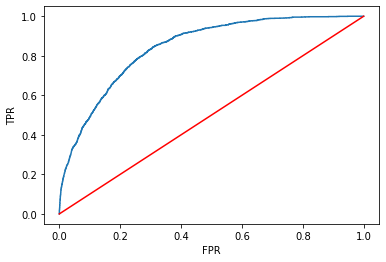

In [130]:
y_test_pred=lgbm.predict(X_test)
y_test_prob = lgbm.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

Best Threshold=0.101000


Text(0, 0.5, 'TPR')

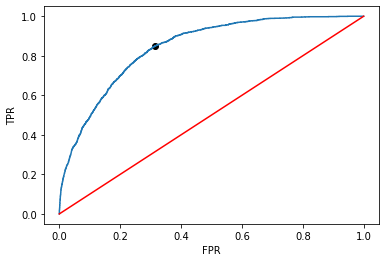

In [131]:
# Plotting the ROC-AUC and identifying the optimal J-Statistic value

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
J = tpr - fpr     #Youden's J-Statistic
ix = np.argmax(J)
best_thresh = np.round(thresholds[ix],3)
print('Best Threshold=%f' % (best_thresh))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [132]:
#Testing with new threshold using Youden’s J statistic.

y_test_pred_newthreshold = (lgbm.predict_proba(X_test)>=best_thresh).astype(int)[:,1]
print(y_test_pred_newthreshold)

#Applying 'y' predicted using the new threshold to find metrics

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred_newthreshold))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred_newthreshold))
print('F1 score - Test : ', f1_score(y_test,y_test_pred_newthreshold))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred_newthreshold))

[0 1 1 ... 0 0 1]
Confusion Matrix - Test :  
 [[8207 3770]
 [ 238 1349]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.97      0.69      0.80     11977
           1       0.26      0.85      0.40      1587

    accuracy                           0.70     13564
   macro avg       0.62      0.77      0.60     13564
weighted avg       0.89      0.70      0.76     13564

F1 score - Test :  0.40232627497763196
Overall Accuracy - Test :  0.704511943379534


### Changing the estimator of IterativeImputer to ExtraTreeRegressor 

In [143]:
from sklearn.ensemble import ExtraTreesRegressor
etr_est = ExtraTreesRegressor(random_state=3)

In [144]:
df_mice = df1.drop('y' , axis=1)
mice_imputer = IterativeImputer(estimator = etr_est, initial_strategy = 'most_frequent', 
                                imputation_order = 'ascending',random_state=3)
df_mice.iloc[:, :] = np.round(mice_imputer.fit_transform(df_mice)) 
df_mice.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome
0,58.0,4.0,1.0,2.0,0.0,2143.0,1.0,0.0,0.0,5.0,8.0,261.0,1.0,0.0
1,44.0,9.0,2.0,1.0,0.0,29.0,1.0,0.0,0.0,5.0,8.0,151.0,1.0,0.0
2,33.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,5.0,8.0,76.0,1.0,0.0
3,47.0,1.0,1.0,0.0,0.0,1506.0,1.0,0.0,0.0,5.0,8.0,92.0,1.0,0.0
4,33.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,8.0,198.0,1.0,0.0


In [145]:
#Checking if imputation was successful
df_mice.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
poutcome     0
dtype: int64

In [146]:
df_new = pd.concat([df_mice,df1['y']], axis=1)
df_new = df_new.astype('int')
df_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58,4,1,2,0,2143,1,0,0,5,8,261,1,0,0
1,44,9,2,1,0,29,1,0,0,5,8,151,1,0,0
2,33,2,1,1,0,2,1,1,0,5,8,76,1,0,0
3,47,1,1,0,0,1506,1,0,0,5,8,92,1,0,0
4,33,3,2,1,0,1,0,0,0,5,8,198,1,0,0


In [147]:
X = df_new.drop('y', axis=1)
y = df_new['y']

In [148]:
Xc= sm.add_constant(X)
vif_val = pd.DataFrame([vif(Xc.values,i) for i in range(Xc.shape[1])], index= Xc.columns, columns=['VIF'])
vif_val

,VIF
const,52.219082
age,1.330287
job,1.054061
marital,1.220969
education,1.096192
default,1.012005
balance,1.034148
housing,1.151612
loan,1.018919
contact,1.054230


In [149]:
cols = list(Xc.columns)

while len(cols)>1:
    X1 = Xc[cols]
    model = sm.Logit(y,X1).fit()
    p = model.pvalues
    max_p = max(p)
    feature_maxp = p.idxmax()
    
    if max_p > 0.05:
        print('feature removed: ',feature_maxp)
        print('p-value of feature: ',max_p)
        cols.remove(feature_maxp)
    else:
        break
        
print('remaining columns: ',cols)

Optimization terminated successfully.
         Current function value: 0.260025
         Iterations 8
feature removed:  contact
p-value of feature:  0.31645405138625926
Optimization terminated successfully.
         Current function value: 0.260036
         Iterations 8
feature removed:  day
p-value of feature:  0.26809059736311525
Optimization terminated successfully.
         Current function value: 0.260049
         Iterations 8
feature removed:  month
p-value of feature:  0.23869936891829857
Optimization terminated successfully.
         Current function value: 0.260065
         Iterations 8
feature removed:  default
p-value of feature:  0.1741320279801173
Optimization terminated successfully.
         Current function value: 0.260086
         Iterations 8
remaining columns:  ['const', 'age', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'duration', 'campaign', 'poutcome']


In [150]:
cols.remove('const')
X = X[cols]

Data is preprocessed and backward elimination is applied for feature selection. 

No multicollinearity was found.

Hence the data is now ready for classification modelling.

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31647, 10), (13564, 10), (31647,), (13564,))

### Resampling of imbalanced data

In [156]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score

In [157]:
result= pd.DataFrame()
ss  = [0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1]
for i in ss:
    smote = SMOTE(sampling_strategy= i,random_state=3)
    X_resampled ,y_resampled = smote.fit_resample(X_train, y_train)
    lgbm.fit(X_resampled, y_resampled)
    y_pred = lgbm.predict(X_test)
    y_pred_prob = lgbm.predict_proba(X_test)[:,1]
    result = result.append({'sample_strategy':i,
                            'accuracy':accuracy_score(y_test,y_pred),
                              'roc_auc_score':roc_auc_score(y_test,y_pred_prob),
                              'precision':precision_score(y_test, y_pred), 
                              'recall':recall_score(y_test, y_pred),
                              'f1_score':f1_score(y_test,y_pred)}, ignore_index=True)
    
    
result

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
0,0.903421,0.501142,0.638215,0.412539,0.898570,0.15
1,0.900324,0.528920,0.595294,0.475862,0.895828,0.20
2,0.894869,0.532152,0.558156,0.508464,0.890010,0.25
3,0.890445,0.536783,0.533788,0.539812,0.887315,0.30
4,0.885948,0.546733,0.513201,0.584953,0.883572,0.35
5,0.879092,0.530624,0.488152,0.581191,0.881207,0.40
6,0.872530,0.530801,0.467943,0.613166,0.881001,0.45
7,0.866706,0.521946,0.451303,0.618809,0.877414,0.50
8,0.861472,0.517587,0.438261,0.631975,0.875289,0.55
9,0.857638,0.519771,0.430750,0.655172,0.875841,0.60


In [158]:
from imblearn.under_sampling import RandomUnderSampler

In [159]:
result= pd.DataFrame()
ss  = [0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1]
for i in ss:
    us = RandomUnderSampler(sampling_strategy= i,random_state=3)
    X_resampled ,y_resampled = us.fit_resample(X_train, y_train)
    lgbm.fit(X_resampled, y_resampled)
    y_pred = lgbm.predict(X_test)
    y_pred_prob = lgbm.predict_proba(X_test)[:,1]
    result = result.append({'sample_strategy':i,
                            'accuracy':accuracy_score(y_test,y_pred),
                              'roc_auc_score':roc_auc_score(y_test,y_pred_prob),
                              'precision':precision_score(y_test, y_pred), 
                              'recall':recall_score(y_test, y_pred),
                              'f1_score':f1_score(y_test,y_pred)}, ignore_index=True)
    
    
result

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
0,0.902978,0.495785,0.637438,0.405643,0.900207,0.15
1,0.902462,0.547383,0.602410,0.501567,0.899350,0.20
2,0.897154,0.565014,0.562035,0.568025,0.898879,0.25
3,0.891256,0.568587,0.532895,0.609404,0.897928,0.30
4,0.887054,0.575858,0.515617,0.652038,0.899858,0.35
5,0.881156,0.573319,0.496106,0.678997,0.900273,0.40
6,0.873046,0.566247,0.473263,0.704702,0.899631,0.45
7,0.869213,0.565409,0.464013,0.723511,0.900458,0.50
8,0.862356,0.559358,0.448524,0.742947,0.900187,0.55
9,0.859923,0.557110,0.443414,0.749216,0.899890,0.60


### combination of SMOTE and random under sampling

In [162]:
lgbm = lgb.LGBMClassifier(boosting_type = 'dart')

In [163]:
result= pd.DataFrame()
ss  = [0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1]
for i in ss:
    over_sampling = SMOTE(sampling_strategy= i,random_state=3)
    X_resampled ,y_resampled = over_sampling.fit_resample(X_train, y_train)
    
    for j in np.arange(i,1,0.05):
        under_sampler = RandomUnderSampler(sampling_strategy = np.round(j,2), random_state=3)
        X_under ,y_under = under_sampler.fit_resample(X_resampled ,y_resampled)
        lgbm.fit(X_under ,y_under)
        y_pred = lgbm.predict(X_test)
        y_pred_prob = lgbm.predict_proba(X_test)[:,1]
        result = result.append({'sample_strategy_o':i,
                                'sample_strategy_u':np.round(j,2),
                                'accuracy':accuracy_score(y_test,y_pred),
                                  'roc_auc_score':roc_auc_score(y_test,y_pred_prob),
                                  'precision':precision_score(y_test, y_pred), 
                                  'recall':recall_score(y_test, y_pred),
                                  'f1_score':f1_score(y_test,y_pred)}, ignore_index=True)
    
    
print("done")   
result

done


,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy_o,sample_strategy_u
0,0.902831,0.509673,0.626715,0.429467,0.898584,0.15,0.15
1,0.899956,0.555810,0.581507,0.532288,0.898582,0.15,0.20
2,0.893542,0.571767,0.542487,0.604389,0.899235,0.15,0.25
3,0.885801,0.570557,0.511431,0.645141,0.899256,0.15,0.30
4,0.881009,0.570516,0.495608,0.672100,0.899121,0.15,0.35
...,...,...,...,...,...,...,...
151,0.824388,0.503543,0.377146,0.757367,0.880030,0.85,1.00
152,0.832866,0.511317,0.389619,0.743574,0.878173,0.90,0.90
153,0.829401,0.507869,0.384294,0.748589,0.878089,0.90,0.95
154,0.831097,0.508052,0.386349,0.741693,0.877405,0.95,0.95


In [164]:
result[(result['recall'] >= 0.79) & (result['precision'] >= 0.39)]

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy_o,sample_strategy_u
10,0.839428,0.537776,0.406481,0.794357,0.898722,0.15,0.65
11,0.834710,0.533306,0.399190,0.803135,0.898587,0.15,0.70
12,0.829770,0.529256,0.392145,0.813793,0.898530,0.15,0.75


In [165]:
over_sampling = SMOTE(sampling_strategy= 0.15,random_state=3)
X_over_sampled ,y_over_sampled = over_sampling.fit_resample(X_train, y_train)
under_sampler = RandomUnderSampler(sampling_strategy = 0.70, random_state=3)
X_resampled ,y_resampled = under_sampler.fit_resample(X_over_sampled ,y_over_sampled)

Confusion Matrix - Train :  
 [[5200  788]
 [ 680 3512]]
Overall Accuracy - Train :  0.8557956777996071
AUC - Train :  0.9294328757706252
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      5988
           1       0.82      0.84      0.83      4192

    accuracy                           0.86     10180
   macro avg       0.85      0.85      0.85     10180
weighted avg       0.86      0.86      0.86     10180

Confusion Matrix - Test :  
 [[10041  1928]
 [  314  1281]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.97      0.84      0.90     11969
           1       0.40      0.80      0.53      1595

    accuracy                           0.83     13564
   macro avg       0.68      0.82      0.72     13564
weighted avg       0.90      0.83      0.86     13564

F1 score - Test :  0.5333055786844296
Overall Accuracy - Test :  0.834709525213

Text(0, 0.5, 'TPR')

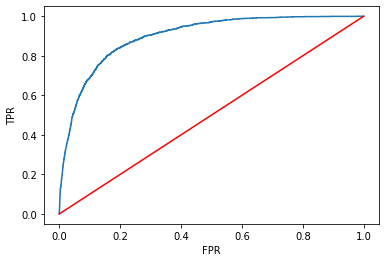

In [166]:
lgbm.fit(X_resampled, y_resampled)
y_resampled_pred=lgbm.predict(X_resampled)
y_resampled_prob = lgbm.predict_proba(X_resampled)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_resampled,y_resampled_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_resampled,y_resampled_pred))
print('AUC - Train : ' , roc_auc_score(y_resampled,y_resampled_prob))
print('Classification Report - Train : ','\n' , classification_report(y_resampled,y_resampled_pred))


y_test_pred=lgbm.predict(X_test)
y_test_prob = lgbm.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

I tried many other resampling methods but this seems to be the best performer in terms of recall and precision.
The best performance was given by the Light GBM algorithm, with a resampling combination of SMOTE and Random undersampling.

The results are :

AUC Score : 0.898 (approx .9)
Accuracy : 0.84
F1 Score : 0.53
Recall : 0.8
Precision : 0.4

In [167]:
import pickle

In [171]:
#saving model to disk
pickle.dump(lgbm,open('bank_marketing_model.pkl','wb'))

In [172]:
#loding model to compare the results
model = pickle.load(open('bank_marketing_model.pkl','rb'))

In [180]:
input_to_check  = np.array(list(X.iloc[0])).reshape(1,10)
print(input_to_check)

[[  58    4    1    2 2143    1    0  261    1    0]]


In [181]:
output_result = model.predict(input_to_check)[0]
print(output_result)

0


### The End